In [38]:
import json
import pandas
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy
from sklearn.preprocessing import OneHotEncoder


from matplotlib import pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout,Conv1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
json_file=open('data_full.json')
d=json.load(json_file)

In [40]:
d_train = pandas.DataFrame(d['train'],columns=('Sentence','Intent'))
d_val=pandas.DataFrame(d['val'],columns=('Sentence','Intent'))

input_df = pandas.concat([d_train,d_val])

In [41]:
unique_intents = list(set(d_train["Intent"]))

twenty_unique_intents = random.sample(unique_intents,20)
twenty_unique_intents

['transfer',
 'greeting',
 'damaged_card',
 'next_song',
 'smart_home',
 'reset_settings',
 'alarm',
 'vaccines',
 'order_checks',
 'restaurant_reviews',
 'tell_joke',
 'spelling',
 'calories',
 'update_playlist',
 'change_language',
 'todo_list_update',
 'make_call',
 'last_maintenance',
 'find_phone',
 'gas']

In [42]:
final_train_df = d_train[d_train["Intent"].isin(twenty_unique_intents)]
final_val_df = d_val[d_val["Intent"].isin(twenty_unique_intents)]

# final_input_df = input_df[input_df["Intent"].isin(twenty_unique_intents)]
final_input_df = pandas.concat([final_train_df,final_val_df])

In [43]:
len(final_input_df)

2400

In [44]:
# final_train_intents = final_train_df["Intent"]
# final_val_intents = final_val_df["Intent"]

final_intents = final_input_df["Intent"]

In [45]:
# final_train_sentences = list(final_train_df["Sentence"])
# final_val_sentences = list(final_val_df["Sentence"])

final_input_sentences = list(final_input_df["Sentence"])

In [46]:
lemmatizer = WordNetLemmatizer()
# final_train_words=[]
# for a in final_train_sentences:
#     clean_train_sentences = re.sub(r'[^ a-z A-Z 0-9]'," ",a)
#     words=word_tokenize(clean_train_sentences)
#     final_train_words.append([lemmatizer.lemmatize(b.lower()) for b in words])

In [47]:
# final_val_words=[]
# for a in final_val_sentences:
#     clean_val_sentences = re.sub(r'[^ a-z A-Z 0-9]'," ",a)
#     words=word_tokenize(clean_val_sentences)
#     final_val_words.append([lemmatizer.lemmatize(b.lower()) for b in words])

In [48]:
final_input_words=[]
for a in final_input_sentences:
    clean_input_sentences = re.sub(r'[^ a-z A-Z 0-9]'," ",a)
    words=word_tokenize(clean_input_sentences)
    final_input_words.append([lemmatizer.lemmatize(b.lower()) for b in words])

In [49]:
# for i in range(len(final_train_words)):
#     for j in range(len(final_train_words[i])):
#         if not final_train_words[i][j].isalnum:
#             print("here")

In [50]:
token_input = Tokenizer()
# token_val = Tokenizer()

In [51]:
token_input.fit_on_texts(final_input_words)
# token_val.fit_on_texts(final_val_words)

In [52]:
token_input.word_index

{'to': 1,
 'my': 2,
 'i': 3,
 'the': 4,
 'you': 5,
 'how': 6,
 'me': 7,
 'for': 8,
 'do': 9,
 'please': 10,
 'can': 11,
 'in': 12,
 'a': 13,
 'need': 14,
 'of': 15,
 'what': 16,
 'is': 17,
 'on': 18,
 'are': 19,
 's': 20,
 'song': 21,
 'playlist': 22,
 'have': 23,
 'and': 24,
 'it': 25,
 'tell': 26,
 'setting': 27,
 'account': 28,
 'list': 29,
 'phone': 30,
 'get': 31,
 'card': 32,
 'this': 33,
 'calorie': 34,
 'add': 35,
 'alarm': 36,
 'from': 37,
 'car': 38,
 'go': 39,
 'next': 40,
 'call': 41,
 'gas': 42,
 'set': 43,
 'last': 44,
 'at': 45,
 'one': 46,
 'an': 47,
 'check': 48,
 'know': 49,
 'want': 50,
 'more': 51,
 'when': 52,
 'many': 53,
 'spell': 54,
 'shot': 55,
 'joke': 56,
 'order': 57,
 'your': 58,
 'factory': 59,
 'like': 60,
 'put': 61,
 'review': 62,
 'change': 63,
 'good': 64,
 'wa': 65,
 'language': 66,
 'before': 67,
 'now': 68,
 'any': 69,
 'transfer': 70,
 'out': 71,
 'help': 72,
 'find': 73,
 'new': 74,
 'about': 75,
 'saving': 76,
 'would': 77,
 'by': 78,
 'make': 

In [53]:
len(final_input_sentences)

2400

In [54]:
final_vocab_size = len(token_input.word_index) + 1
max_len=0
# temp = final_train_words + final_val_words
for i in range(len(final_input_words)):
    if len(final_input_words[i]) > max_len:
        max_len=len(final_input_words[i])
max_len

21

In [55]:
# encoded_train = token_train_and_val.texts_to_sequences(final_train_words)
# encoded_val = token_train_and_val.texts_to_sequences(final_val_words)

encoded_input = token_input.texts_to_sequences(final_input_words)

In [56]:
len(encoded_input)

2400

In [57]:
# pad_train = pad_sequences (encoded_train,maxlen=max_len,padding="post")
# pad_val = pad_sequences (encoded_val,maxlen=max_len,padding="post")

pad_input = pad_sequences(encoded_input,maxlen=max_len,padding="post")

In [58]:
output_token = Tokenizer(filters= '!')
output_token.fit_on_texts(twenty_unique_intents)

In [59]:
output_token.word_index

{'transfer': 1,
 'greeting': 2,
 'damaged_card': 3,
 'next_song': 4,
 'smart_home': 5,
 'reset_settings': 6,
 'alarm': 7,
 'vaccines': 8,
 'order_checks': 9,
 'restaurant_reviews': 10,
 'tell_joke': 11,
 'spelling': 12,
 'calories': 13,
 'update_playlist': 14,
 'change_language': 15,
 'todo_list_update': 16,
 'make_call': 17,
 'last_maintenance': 18,
 'find_phone': 19,
 'gas': 20}

In [60]:
encoded_output = output_token.texts_to_sequences(final_intents)
len(encoded_output[0])

1

In [61]:
encoded_output=numpy.array(encoded_output)

In [62]:
encoded_output.shape

(2400, 1)

In [63]:
one_hot_encoder = OneHotEncoder(sparse = False)
one_hot_output = one_hot_encoder.fit_transform(encoded_output)

In [64]:
one_hot_output.shape

(2400, 20)

In [65]:
train_X = pad_input[0:2000+1]
train_Y = one_hot_output[0:2000+1]

val_X = pad_input[2000+2:]
val_Y = one_hot_output[2000+2:]


In [66]:
pad_input.shape

(2400, 21)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 21, 128)           202368    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                660       
Total params: 474,420
Trainable params: 272,052
Non-trainable params: 202,368
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 23ms/step - loss: 2.9920 - accuracy: 0.0491 - val_lo

63/63 [==============================] - 1s 22ms/step - loss: 0.3355 - accuracy: 0.8857 - val_loss: 0.4874 - val_accuracy: 0.8668

Epoch 00034: val_loss did not improve from 0.39818
Epoch 35/100
63/63 [==============================] - 1s 21ms/step - loss: 0.3093 - accuracy: 0.9023 - val_loss: 0.4433 - val_accuracy: 0.8819

Epoch 00035: val_loss did not improve from 0.39818
Epoch 36/100
63/63 [==============================] - 1s 20ms/step - loss: 0.3571 - accuracy: 0.8838 - val_loss: 0.4632 - val_accuracy: 0.8693

Epoch 00036: val_loss did not improve from 0.39818
Epoch 37/100
63/63 [==============================] - 1s 21ms/step - loss: 0.3162 - accuracy: 0.9021 - val_loss: 0.4694 - val_accuracy: 0.8693

Epoch 00037: val_loss did not improve from 0.39818
Epoch 38/100
63/63 [==============================] - 1s 21ms/step - loss: 0.3252 - accuracy: 0.9034 - val_loss: 0.4595 - val_accuracy: 0.8819

Epoch 00038: val_loss did not improve from 0.39818
Epoch 39/100
63/63 [==================

63/63 [==============================] - 1s 23ms/step - loss: 0.1072 - accuracy: 0.9651 - val_loss: 0.5837 - val_accuracy: 0.9020

Epoch 00076: val_loss did not improve from 0.39818
Epoch 77/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1222 - accuracy: 0.9623 - val_loss: 0.5791 - val_accuracy: 0.8970

Epoch 00077: val_loss did not improve from 0.39818
Epoch 78/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1438 - accuracy: 0.9559 - val_loss: 0.7405 - val_accuracy: 0.8769

Epoch 00078: val_loss did not improve from 0.39818
Epoch 79/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1968 - accuracy: 0.9428 - val_loss: 0.6270 - val_accuracy: 0.8995

Epoch 00079: val_loss did not improve from 0.39818
Epoch 80/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1226 - accuracy: 0.9598 - val_loss: 0.4920 - val_accuracy: 0.9045

Epoch 00080: val_loss did not improve from 0.39818
Epoch 81/100
63/63 [==================

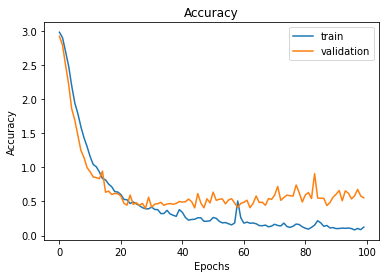

In [67]:
model = Sequential()
model.add(Embedding(final_vocab_size, 128, input_length = max_len, trainable = False))

################  bi directional GRU  #######################
model.add(Bidirectional(LSTM(128)))
#   model.add(LSTM(128))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))



###########  CNN  ################
# model.add(Conv1D(filters=128,kernel_size=2,activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=128,kernel_size=2,activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=128,kernel_size=2,activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128,activation='relu'))

model.add(Dense(20, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(train_X, train_Y, epochs = 100, batch_size = 32, validation_data = (val_X, val_Y), callbacks = [checkpoint])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(["train","validation"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.show()

In [68]:
d['test']

[['how would you say fly in italian', 'translate'],
 ["what's the spanish word for pasta", 'translate'],
 ['how would they say butter in zambia', 'translate'],
 ['how do you say fast in spanish', 'translate'],
 ["what's the word for trees in norway", 'translate'],
 ['how does one say wonderful in german', 'translate'],
 ['how do they say tacos in mexico', 'translate'],
 ['how would one say cruiser in china', 'translate'],
 ["what's the french word you use for potato", 'translate'],
 ['what would the word for grass be in finland', 'translate'],
 ['how do you say please in french', 'translate'],
 ['how would i say nice to meet you if i were russian', 'translate'],
 ['what is the right way to say excuse me in spanish', 'translate'],
 ["how do i say i'm sorry in chinese", 'translate'],
 ['how would i say thank you if i were mexican', 'translate'],
 ['how would i say what is your name if i were french', 'translate'],
 ['how would i say i must be going now if i were german', 'translate'],
 [

In [69]:
d_test = pandas.DataFrame(d['test'],columns=('Sentence','Intent'))

In [70]:
final_test_df = d_test[d_test["Intent"].isin(twenty_unique_intents)]

In [71]:
final_test_intents = final_test_df["Intent"]

In [72]:
final_test_sentences = list(final_test_df["Sentence"])

In [73]:
lemmatizer = WordNetLemmatizer()

In [74]:
final_test_words=[]
for a in final_test_sentences:
    clean_test_sentences = re.sub(r'[^ a-z A-Z 0-9]'," ",a)
    words=word_tokenize(clean_test_sentences)
    final_test_words.append([lemmatizer.lemmatize(b.lower()) for b in words])

In [75]:
token_test = Tokenizer()

In [76]:
token_test.fit_on_texts(final_test_words)

In [77]:

# max_test_len=0
# temp = final_train_words + final_val_words
# for i in range(len(final_input_words)):
#     if len(final_input_words[i]) > max_len:
#         max_len=len(final_input_words[i])
# max_len

In [78]:
encoded_test = token_test.texts_to_sequences(final_test_words)

In [79]:
pad_test = pad_sequences(encoded_test,maxlen=max_len,padding="post")

In [80]:
model=load_model("model.h5")

In [81]:
predictions = model.predict_proba(pad_test)

c:\users\karan\desktop\loyal_test\loyal_test\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [82]:
len(predictions)

600

In [83]:
# list(final_test_intents)[0]
# encoded_output
# twenty_unique_intents.index(list(final_test_intents)[0])
# twenty_unique_intents
# list(final_test_intents)

In [84]:
final_mod_test_intents=[]
for i in range(len(final_test_intents)):
    final_mod_test_intents.append(twenty_unique_intents.index(list(final_test_intents)[i]))

In [85]:
final_mod_test_intents

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,


In [86]:
correct=0
for i in range(len(predictions)):
    max_index = numpy.argmax(predictions[i])
    
    if max_index == final_mod_test_intents[i]:
        correct+=1

accuracy = correct / len(predictions)

In [87]:
accuracy

0.14833333333333334

In [88]:
#Credits : https://github.com/Dark-Sied/Intent_Classification/blob/master/Intent_classification_final.ipynb

In [89]:
""" 
Loading the data : 
    The data was loaded using the json load function.
    The data was read as a data frame in parts by specifying the keys in the dictionary : train, test, validation

Cleaning and pre-processing:
    Then the train and validation data frames were concatenated so that I could get one single data frame to be able to 
    the network.
    20 unique intents were then randomly chosen and saved as a list separately so that I could use it later for the one 
    hot encoded output.
    A list of sentences was extracted from the data so that we could further process it. 
    The sentences were cleaned and only alphanumeric characters were retained.
    Then the sentences were converted into list of words using "word_tokenize".
    A lemmatizer was then used on each list to convert the similar words into one like for example, the words 
    like "pencils" and "pencil" were all converted to "pencil".
    
Feature extraction and representation :
    A tokenizer was used to convert the list of words into a structure similar to a dictionary where each word was 
    assigned an index. 
    Using this token, the list of sentences was converted into a sequence of indices.
    Then this sequence was padded based on the size of the sentence with the maximum words so that out input is 
    standard.
    The output intents(unique intents) were tokenized as well similarly and the converted into a one hot vector.
    
    
Creating and training model:
    A bidirectional LSTM was used initially as given in the code which I referred. 
    I then modified the model to use CNN instead as mentioned in the article : https://medium.com/jatana/report-on-text-classification-using-cnn-rnn-han-f0e887214d5f
    The CNN model is commented out in the code.
    The architecture of the CNN was :
    Conv1d , Maxpool1D, Conv1d , Maxpool1D, Conv1d , Maxpool1D, Flatten, Dense 
    I could also combine multiple bidirectional LSTMs but I did not get enough time to do it.
    I also did not get enough time to change the original loss : crossentropy and optimizer: adam but if I had the time,
    I would have experimented with a couple.
    I could also have experimented a bit with dropouts if I had more time.
    
    The CNN gave slightly better results than birectional LSTM with CNN giving test accuracy as around 16% and bidirectional
    LSTM as 13%. I think CNNs perform better because we have very less data, or rather we choose to deal with less data. 
    
    I think if we had more data, we could have seen better performances by both. 
    
    But based on the graphs, I feel that I am doing it right because the validation curve has lesser accuracy than the 
    training curve.
    

Challenges and further modifications :
    Each step in ths project was a challenge for me. 
    If I could work more on this project, I would definitely see how I could improve the accuracy, experiment with using
    more intent classes, stacking multiple LSTMS, experimenting with the loss functions and also experimenting with the 
    dropouts.
    Also, I would make functions in the code so that I did not have to rewrite the code. I did not write functions here
    because I was experimenting with the code as I was moving forward.


"""

' \nLoading the data : \n    The data was loaded using the json load function.\n    The data was read as a data frame in parts by specifying the keys in the dictionary : train, test, validation\n\nCleaning and pre-processing:\n    Then the train and validation data frames were concatenated so that I could get one single data frame to be able to \n    the network.\n    20 unique intents were then randomly chosen and saved as a list separately so that I could use it later for the one \n    hot encoded output.\n    A list of sentences was extracted from the data so that we could further process it. \n    The sentences were cleaned and only alphanumeric characters were retained.\n    Then the sentences were converted into list of words using "word_tokenize".\n    A lemmatizer was then used on each list to convert the similar words into one like for example, the words \n    like "pencils" and "pencil" were all converted to "pencil".\n    \nFeature extraction and representation :\n    A toke